# Regression Demo

In this demo we predict the average housing price in Boston. 

- The data: "Housing data for 506 census tracts of Boston from the 1970 census."
- Variables:
  - **crim**: per capita crime rate by town
  - **zn**: proportion of residential land zoned for lots over 25,000 sq.ft
  - **indus**: proportion of non-retail business acres per town
  - **chas**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
  - **nox**: nitric oxides concentration (parts per 10 million)
  - **rm**: average number of rooms per dwelling
  - **age**: proportion of owner-occupied units built prior to 1940
  - **dis**: weighted distances to five Boston employment centres
  - **rad**: index of accessibility to radial highways
  - **tax**: full-value property-tax rate per USD 10,000
  - **ptratio**: pupil-teacher ratio by town
  - **b**: 1000(B - 0.63)^2 where B is the proportion of blacks by town
  - **lstat**: percentage of lower status of the population
  - **medv**: median value of owner-occupied homes in USD 1000's


The outcome variable is **medv**


## Import packages

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Get Data

In [49]:
!wget https://www.dropbox.com/s/isz2mvhqui1bw9c/boston.csv -O boston.csv

--2021-12-05 21:54:56--  https://www.dropbox.com/s/isz2mvhqui1bw9c/boston.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/isz2mvhqui1bw9c/boston.csv [following]
--2021-12-05 21:54:56--  https://www.dropbox.com/s/raw/isz2mvhqui1bw9c/boston.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0f1aca502a55b4c8733abd1e75.dl.dropboxusercontent.com/cd/0/inline/BbSNHFMKdWOKaIqBIf6YioXx_vKf2ygjB7VhJTZNUyLA4QRHqHjRZXHx54w76ODkX_lQdGXAVOnMzcIhOlSHVHHIND1c2UHNJsc6wtwwoEgPPg1G0Fmr3kfMZ9IKLU4V7fJsZ6RWui0HBQUK1UtEbVkO/file# [following]
--2021-12-05 21:54:56--  https://uc0f1aca502a55b4c8733abd1e75.dl.dropboxusercontent.com/cd/0/inline/BbSNHFMKdWOKaIqBIf6YioXx_vKf2ygjB7VhJTZNUyLA4QRHqHjRZXHx54w76ODkX_lQdGXAVOnMzcIhOlSHVHHIND1c2UHN

In [50]:
df_boston = pd.read_csv("boston.csv")

In [51]:
df_boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [52]:
df_boston.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


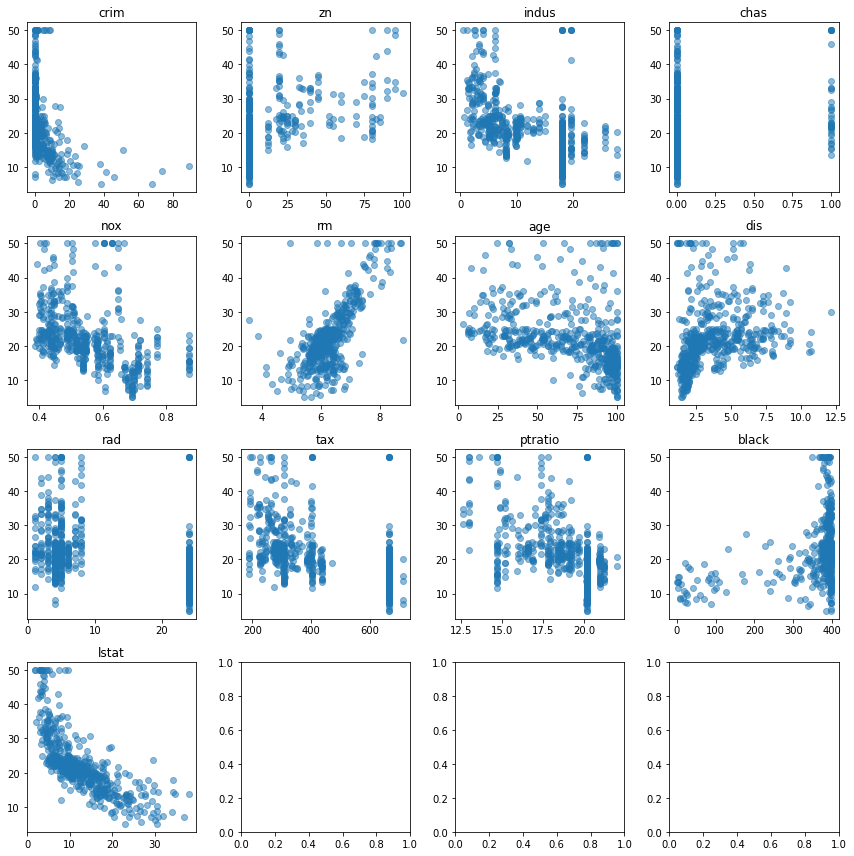

In [53]:
fig,axes = plt.subplots(nrows = 4, ncols=4, figsize = (12, 12))

axes = axes.flatten()

for i in range(0, 13):
  axes[i].plot(df_boston.iloc[:,i],df_boston['medv'],'o', alpha = .5)
  axes[i].set_title(df_boston.columns[i])

plt.tight_layout()

#sns.pairplot(df_boston)

### Train-Test Split

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X = df_boston.drop("medv", axis = 1)
y = df_boston['medv']

In [56]:
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [58]:
X_test

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
195,0.01381,80.0,0.46,0,0.422,7.875,32.0,5.6484,4,255,14.4,394.23,2.97
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
434,13.91340,0.0,18.10,0,0.713,6.208,95.0,2.2222,24,666,20.2,100.63,15.17
458,7.75223,0.0,18.10,0,0.713,6.301,83.7,2.7831,24,666,20.2,272.21,16.23
39,0.02763,75.0,2.95,0,0.428,6.595,21.8,5.4011,3,252,18.3,395.63,4.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,0.14052,0.0,10.59,0,0.489,6.375,32.3,3.9454,4,277,18.6,385.81,9.38
269,0.09065,20.0,6.96,1,0.464,5.920,61.5,3.9175,3,223,18.6,391.34,13.65
278,0.07978,40.0,6.41,0,0.447,6.482,32.1,4.1403,4,254,17.6,396.90,7.19
17,0.78420,0.0,8.14,0,0.538,5.990,81.7,4.2579,4,307,21.0,386.75,14.67


## Standardizing the data

This is not strictly necessary for OLS, but I will do anyway.

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
scaler = StandardScaler()

In [61]:
scaler.fit(X_train)

StandardScaler()

In [62]:
X_train_scaled = scaler.transform(X_train)

In [63]:
X_train_scaled

array([[-0.42704101,  4.09805388, -1.2821606 , ..., -1.75847274,
         0.36848849, -1.47206228],
       [ 0.36426841, -0.48006999,  0.95531935, ...,  0.78573951,
         0.38490745, -1.46049687],
       [ 0.01647159, -0.48006999,  0.95531935, ...,  0.78573951,
         0.34736276, -0.35889127],
       ...,
       [-0.42578825, -0.48006999, -0.91795342, ...,  0.78573951,
         0.41511834, -0.36178262],
       [-0.41521993,  0.12231473, -0.52907882, ..., -1.52718072,
         0.43799542,  0.02999575],
       [-0.41982916,  2.41137667, -1.42581204, ..., -0.09317018,
         0.15208658, -1.09474068]])

In [64]:
X_test_scaled = scaler.transform(X_test)

## Estimating the model

In [65]:
from sklearn.linear_model import LinearRegression

### Train the model


In [66]:
model_lm = LinearRegression()

In [67]:
model_lm.fit(X_train_scaled, y_train)

LinearRegression()

In [68]:
pred_train = model_lm.predict(X_train_scaled)

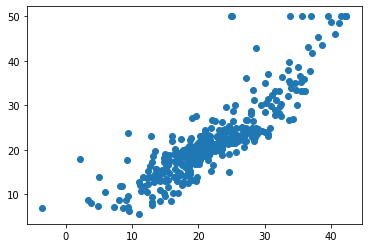

In [69]:
plt.plot(pred_train, y_train, 'o')

## Model evaluations

In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [71]:
pred_test = model_lm.predict(X_test_scaled)

In [72]:
MAE = mean_absolute_error(y_test, pred_test)
MSE = mean_squared_error(y_test, pred_test)
RMSE = np.sqrt(mean_squared_error(y_test, pred_test))

In [73]:
[MAE, MSE, RMSE]

[3.8356963614189374, 28.547585271468147, 5.342994036256091]

In [74]:
df_boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Analyzing Errors



In [75]:
test_error = y_test - pred_test

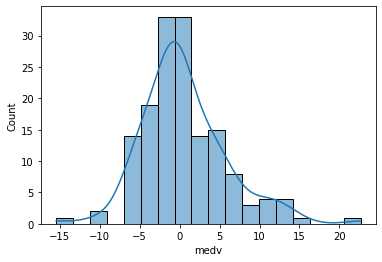

In [76]:
sns.histplot(test_error, kde = True)

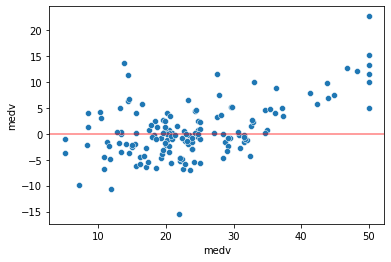

In [77]:
sns.scatterplot(x = df_boston['medv'], y = test_error)
plt.axhline(y = 0, color = 'r', alpha = .5)

# Polynomial Regression

## Import module

In [78]:
from sklearn.preprocessing import PolynomialFeatures

## Generate the polynomial data

### Standardization

## Fit the model

## Model evaluations

Caclulate the metrics. Is it any better than the regression without polynomials?

## Analyzing errors

Now, check the error distributions, and see how much improve it made

## Try higher order polynomial

Let's try polynomials with 3 or more degrees. What do we find?

# Regularized regressions

## Ridge Regression

### Load package

In [102]:
from sklearn.linear_model import RidgeCV

### Model fitting and evaluation

## LASSO 

In [116]:
from sklearn.linear_model import LassoCV

### Model fitting and evaluation